## Exploratory Data Analysis for Data Analysts in USA

In [1]:
#Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
#loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [3]:
#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for Data Analyst Roles in the US

In [4]:
df_DA_US = df[(df.job_country=='United States') & (df.job_title_short=='Data Analyst')]

In [5]:
df_DA_US.job_location.value_counts().head(10).to_frame()

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


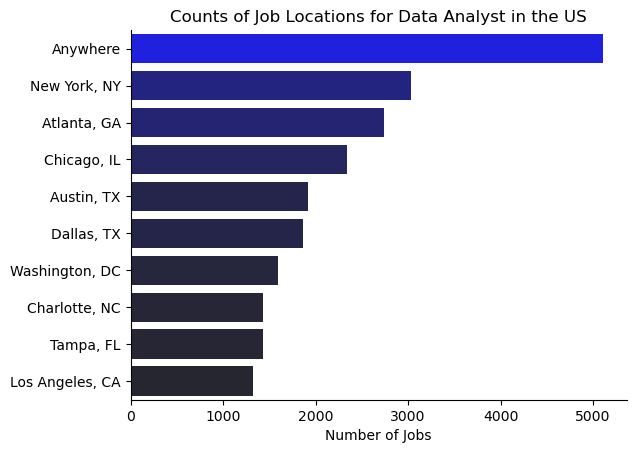

In [8]:
df_plot = df_DA_US.job_location.value_counts().head(10).to_frame()


sns.barplot(data=df_plot, x='count', y='job_location', hue='count', legend=False, palette='dark:b')
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.despine()
plt.show()

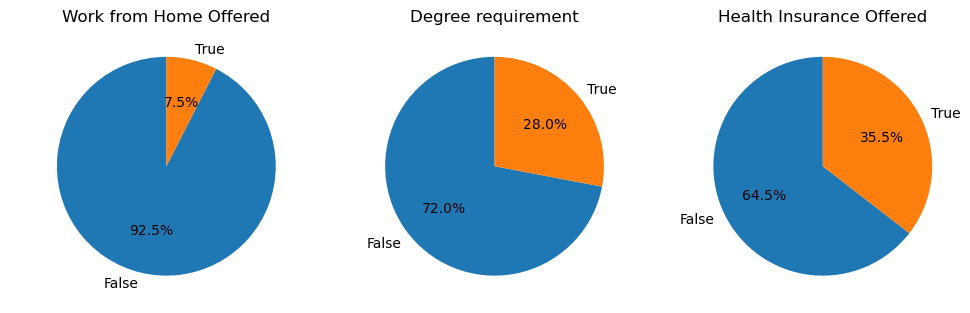

In [19]:
dict_column = {
    'job_work_from_home':'Work from Home Offered',
    'job_no_degree_mention':'Degree requirement',
    'job_health_insurance':'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches(12,5)

for i, (column, title) in enumerate(dict_column.items()):
    df_DA_US[column].value_counts().plot(kind = 'pie', ax = ax[i], title = title, startangle = 90, autopct = "%1.1f%%")
    ax[i].set_ylabel(' ')

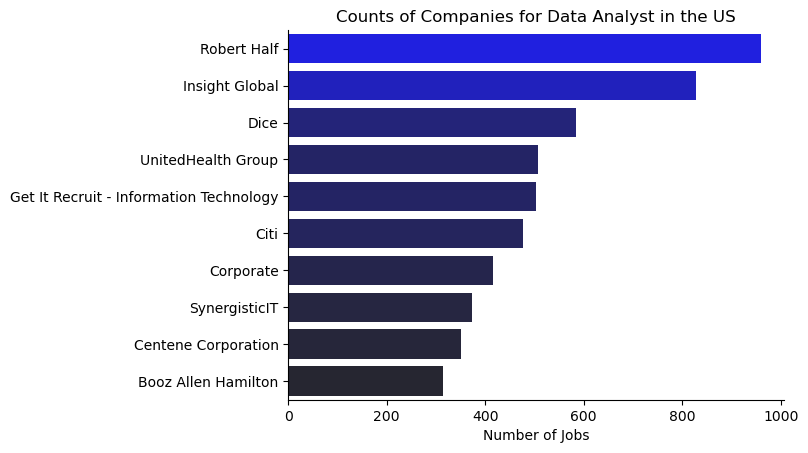

In [20]:
df_plot = df_DA_US.company_name.value_counts().head(10).to_frame()


sns.barplot(data=df_plot, x='count', y='company_name', hue='count', legend=False, palette='dark:b')
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
sns.despine()
plt.show()